<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-08-16 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 6.0</font></h3>

### Your information:
- Fullname: Trẩn Bửu Hiệp
- Date of birth: 21/07/1997
- Place of birth: Đồng Nai
- Email: hieplk97@gmail.com
- Mobile phone: 0962057721

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Regression Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### Tips: Step by step like Chapter2_Ex1_Housing prices 

### Load Data From CSV File  

In [4]:
# Read CSV file: loan_train.csv
# code here
df = pd.read_csv('loan_train.csv')

In [5]:
# Understanding to dataset
# shape
# info
# head(), tail()
# describe()

In [6]:
df.shape

(346, 10)

In [7]:
df.info

<bound method DataFrame.info of      Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0     PAIDOFF       1000     30       9/8/2016   
1             2             2     PAIDOFF       1000     30       9/8/2016   
2             3             3     PAIDOFF       1000     15       9/8/2016   
3             4             4     PAIDOFF       1000     30       9/9/2016   
4             6             6     PAIDOFF       1000     30       9/9/2016   
..          ...           ...         ...        ...    ...            ...   
341         394           394  COLLECTION        800     15      9/11/2016   
342         395           395  COLLECTION       1000     30      9/11/2016   
343         397           397  COLLECTION        800     15      9/12/2016   
344         398           398  COLLECTION       1000     30      9/12/2016   
345         399           399  COLLECTION       1000     30      9/12/2016   

       due_date  age           

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [10]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


### Convert 'due_date', 'effective_date' to date time object 

In [11]:
# code here
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


# Data visualization

How many sample of each class is in our data set?

In [12]:
# code

In [13]:
# Quantitative
numbers = [f for f in  df.columns if df.dtypes[f] != 'object']
list_nums = ', '.join(numbers)
list_nums

'Unnamed: 0, Unnamed: 0.1, Principal, terms, effective_date, due_date, age'

In [14]:
# Qualitative
objects = [f for f in  df.columns if df.dtypes[f] == 'object']
list_obj = ', '.join(objects)
list_obj

'loan_status, education, Gender'

In [15]:
# Categorical
i = 1
for obj in objects:
    print(i, '/', obj, '\t', len(df[obj].unique()), ':', df[obj].unique())
    i += 1

1 / loan_status 	 2 : ['PAIDOFF' 'COLLECTION']
2 / education 	 4 : ['High School or Below' 'Bechalor' 'college' 'Master or Above']
3 / Gender 	 2 : ['male' 'female']


**xxx** people have paid off the loan on time while **xxx** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

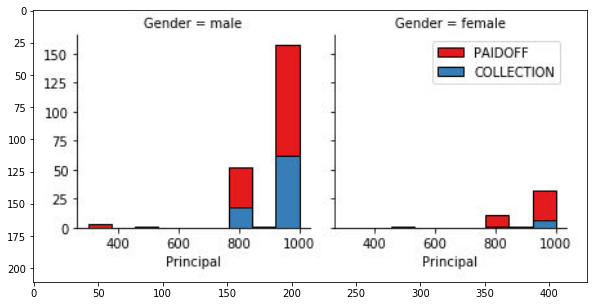

In [18]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.show()

In [19]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

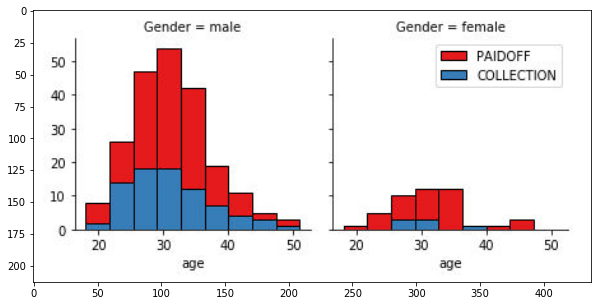

In [20]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.show()

In [21]:
# code here
import seaborn as sns

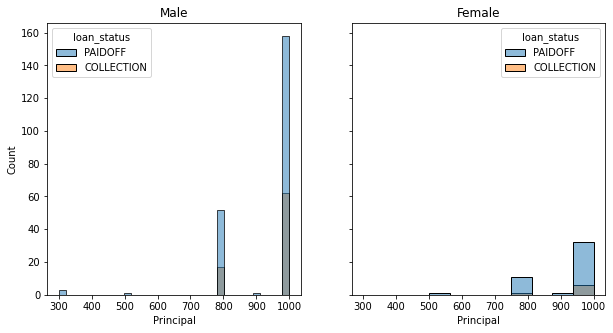

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), sharey=True, sharex=True)
ax1.set_title('Male')
sns.histplot(data=df[df.Gender=='male'], x='Principal', hue='loan_status', ax=ax1)
ax2.set_title('Female')
sns.histplot(data=df[df.Gender=='female'], x='Principal', hue='loan_status', ax=ax2)
plt.show()

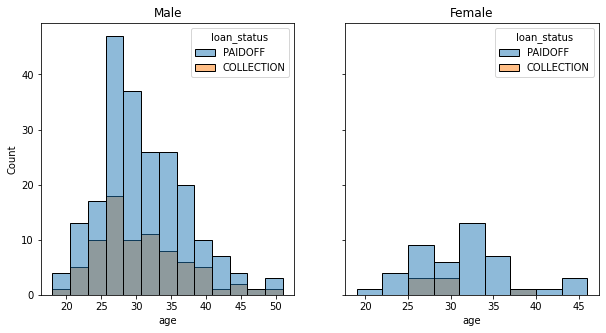

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
ax1.set_title('Male')
sns.histplot(data=df[df.Gender=='male'], x='age', hue='loan_status', ax=ax1)
ax2.set_title('Female')
sns.histplot(data=df[df.Gender=='female'], x='age', hue='loan_status', ax=ax2)
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [24]:
# code here
df['dayofweek'] = df['effective_date'].dt.dayofweek

Lets plot some columns to underestand data better:

In [25]:
img3 = np.array(Image.open('day_of_week.jpg'))

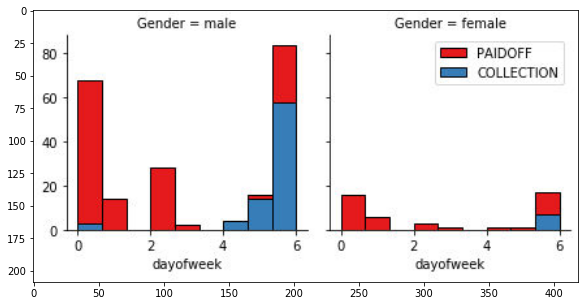

In [26]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.show()

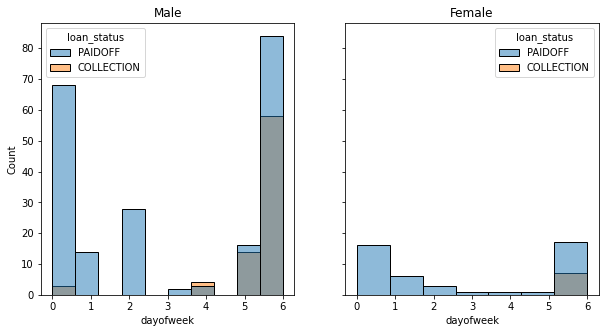

In [27]:
# code here
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
ax1.set_title('Male')
sns.histplot(data=df[df.Gender=='male'], x='dayofweek', hue='loan_status', ax=ax1)
ax2.set_title('Female')
sns.histplot(data=df[df.Gender=='female'], x='dayofweek', hue='loan_status', ax=ax2)
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [28]:
# code here
df['weekend'] = np.where(df['dayofweek']>3, 1, 0)

In [29]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [30]:
# code here
occ = df.groupby(by=['Gender']).count()['loan_status']
occ

Gender
female     52
male      294
Name: loan_status, dtype: int64

**xxx** % of female pay there loans while only **xxx** % of males pay there loan

Lets convert male to 0 and female to 1:


In [31]:
# code here

In [32]:
df = pd.get_dummies(df, columns=['Gender'])
df.drop(columns=['Gender_male'], axis=1, inplace=True)
df.rename(columns={'Gender_female': 'Gender'}, inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,dayofweek,weekend,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,3,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,3,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,3,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,4,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,4,1,0


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [33]:
# code here
occ = df.groupby(by=['education']).count()['loan_status']
occ

education
Bechalor                 44
High School or Below    151
Master or Above           2
college                 149
Name: loan_status, dtype: int64

#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [34]:
# code here
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [35]:
# code here
feature_df = df[['Principal','terms','age','Gender','weekend', 'education']]

In [36]:
edu_df = pd.get_dummies(feature_df, columns=['education'], prefix='', prefix_sep='')
edu_df.drop(columns=['Master or Above'], inplace=True)

In [37]:
edu_df.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [38]:
df = pd.concat([df, edu_df], axis=1).drop_duplicates().reset_index(drop=True)
df = df.loc[:,~df.columns.duplicated()]
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,dayofweek,weekend,Gender,Bechalor,High School or Below,college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,3,0,0,0,1,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,3,0,1,1,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,3,0,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,4,1,1,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,4,1,0,0,0,1


### Feature selection

Lets define feature sets, X:
- X is input, X = Feature

In [39]:
# code here
X = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'education', 'effective_date','dayofweek', 'due_date'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             346 non-null    int64
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3   weekend               346 non-null    int32
 4   Gender                346 non-null    uint8
 5   Bechalor              346 non-null    uint8
 6   High School or Below  346 non-null    uint8
 7   college               346 non-null    uint8
dtypes: int32(1), int64(3), uint8(4)
memory usage: 10.9 KB


What are our lables?
- y is output, y = 'loan_status' column

In [40]:
# code here
y = df[['loan_status']]

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [41]:
# code here
from sklearn import preprocessing

In [42]:
age_principal = df[['age', 'Principal']].astype('float64')
age_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        346 non-null    float64
 1   Principal  346 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [45]:
scaler = preprocessing.StandardScaler()
ss_scaler = scaler.fit_transform(age_principal)
df_scaler = pd.DataFrame(ss_scaler, columns=['age_ss', 'principal_ss'])
df_scaler.head()

,age_ss,principal_ss
0,2.331526,0.515785
1,0.341701,0.515785
2,-0.653211,0.515785
3,-0.487392,0.515785
4,-0.321573,0.515785
